In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import matplotlib.ticker as mtick

## Load data

In [188]:
path_train = r"train_data.csv"
path_test = r"test_data.csv"

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [189]:
df_train.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
0,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
1,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.050000
2,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
3,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.000000
4,MOBIL,CASUAL,0,2022-10-10,2022-10-10,0.033333


In [190]:
# Ubah kolom Date menjadi objek datetime
df_train['Exit_date'] = pd.to_datetime(df_train['Exit_date'], format='%Y-%m-%d')

# Ekstrak bulan dan tahun dari kolom Date
df_train['Month'] = df_train['Exit_date'].dt.strftime('%B %Y')

df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43448 entries, 0 to 43447
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Vehicle Type       43448 non-null  object        
 1   Parking Slip Type  43448 non-null  object        
 2   Total Income       43448 non-null  int64         
 3   Exit_date          43448 non-null  datetime64[ns]
 4   Entry_date         43448 non-null  object        
 5   Duration           43448 non-null  float64       
 6   Month              43448 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [191]:
df_train = df_train.sort_values(by='Exit_date')
df_train.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration,Month
0,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667,October 2022
1,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.050000,October 2022
2,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667,October 2022
3,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.000000,October 2022
4,MOBIL,CASUAL,0,2022-10-10,2022-10-10,0.033333,October 2022


## Informasi Dataset

### Data Training

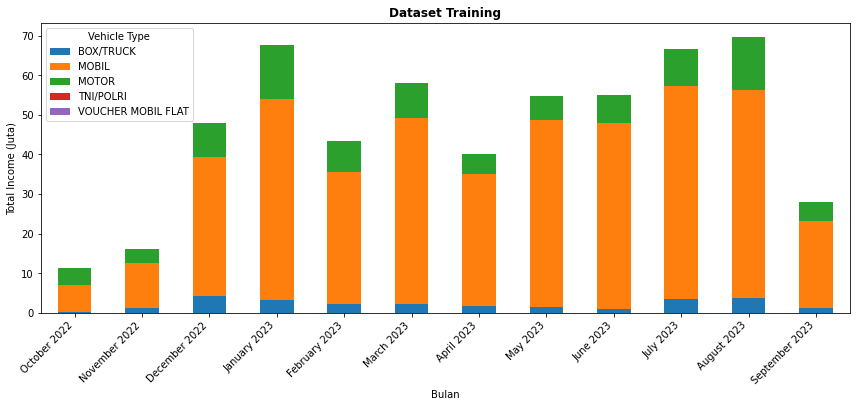

In [192]:
# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df_train.pivot_table(index='Month', columns='Vehicle Type', values='Total Income', aggfunc='sum', fill_value=0)

# Mengurutkan DataFrame berdasarkan bulan
sorted_months = pd.to_datetime(pivot_df.index, format='%B %Y').sort_values().strftime('%B %Y')
pivot_df = pivot_df.reindex(sorted_months)

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income (Juta)')

# Menambahkan judul plot
ax.set_title('Dataset Training', weight='bold')

# Menambahkan legenda
ax.legend(title='Vehicle Type')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.tight_layout()
plt.xticks(range(len(sorted_months)), sorted_months, rotation=45, ha='right')
plt.show()

In [193]:
train_day = df_train.groupby('Month')['Total Income'].sum().reset_index()
# Ubah kolom 'Month' menjadi objek datetime dengan format 'Month Year'
train_day['Month_num'] = pd.to_datetime(train_day['Month'], format='%B %Y')

# Urutkan DataFrame berdasarkan kolom 'Month'
train_day = train_day.sort_values(by='Month_num')
train_day.reset_index(drop=True, inplace=True)
train_day

,Month,Total Income,Month_num
0,October 2022,11291011,2022-10-01
1,November 2022,16131000,2022-11-01
2,December 2022,47998000,2022-12-01
3,January 2023,67551000,2023-01-01
4,February 2023,43412000,2023-02-01
5,March 2023,58110000,2023-03-01
6,April 2023,39964000,2023-04-01
7,May 2023,54690000,2023-05-01
8,June 2023,55055000,2023-06-01
9,July 2023,66616000,2023-07-01


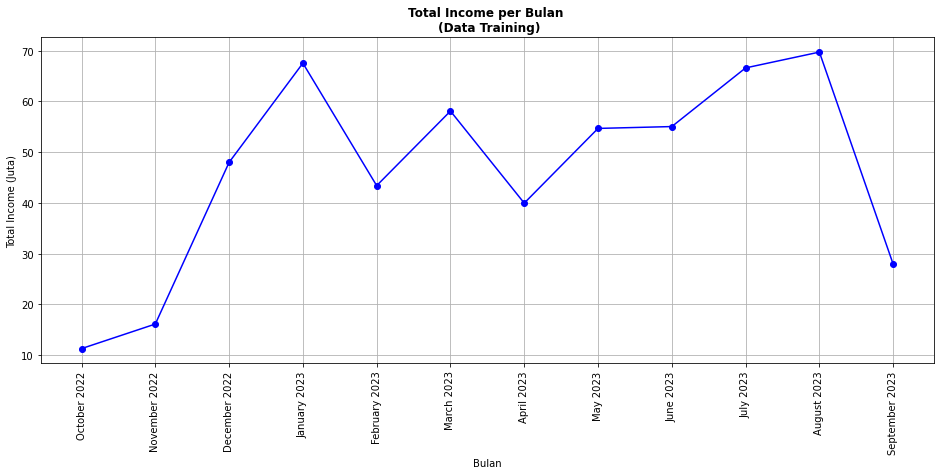

In [194]:
plt.figure(figsize=(16, 6))
plt.plot(train_day['Month'],train_day['Total Income'],  marker = 'o', linestyle='-', color='b')
plt.title('Total Income per Bulan \n (Data Training)', weight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Income (Juta)')
plt.grid(True)
# Mengubah format ylabel menjadi jutaan
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.xticks(rotation=90)
plt.show()

### Data Testing

In [195]:
# Ubah kolom Date menjadi objek datetime
df_test['Exit_date'] = pd.to_datetime(df_test['Exit_date'], format='%Y-%m-%d')

# Ekstrak bulan dan tahun dari kolom Date
df_test['Month'] = df_test['Exit_date'].dt.strftime('%B %Y')
df_test = df_test.sort_values(by='Exit_date')
df_test.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration,Month
0,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.033333,October 2022
1,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.000000,October 2022
2,MOTOR,CASUAL,0,2022-10-12,2022-10-12,6.250000,October 2022
3,MOBIL,CASUAL,0,2022-10-12,2022-10-12,0.700000,October 2022
4,MOTOR,CASUAL,0,2022-10-12,2022-10-12,8.033333,October 2022


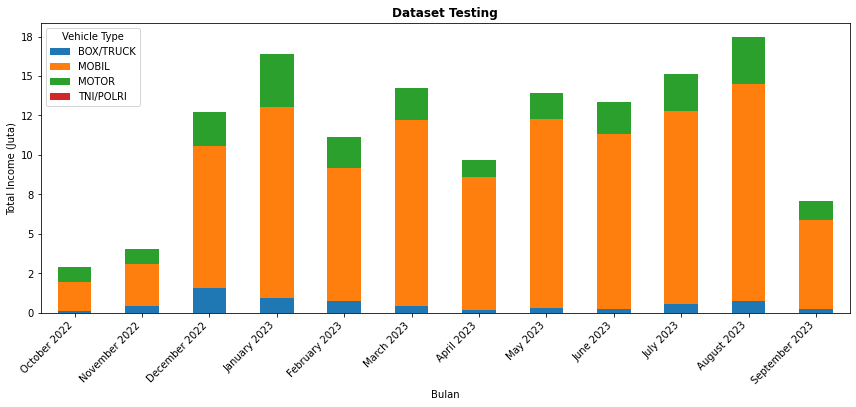

In [196]:
# Pivot tabel untuk menghitung pendapatan total untuk setiap kategori kendaraan di setiap bulan
pivot_df = df_test.pivot_table(index='Month', columns='Vehicle Type', values='Total Income', aggfunc='sum', fill_value=0)

# Mengurutkan DataFrame berdasarkan bulan
sorted_months = pd.to_datetime(pivot_df.index, format='%B %Y').sort_values().strftime('%B %Y')
pivot_df = pivot_df.reindex(sorted_months)

# Buat stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Menambahkan label sumbu X
ax.set_xlabel('Bulan')

# Menambahkan label sumbu Y
ax.set_ylabel('Total Income (Juta)')

# Menambahkan judul plot
ax.set_title('Dataset Testing', weight='bold')

# Menambahkan legenda
ax.legend(title='Vehicle Type')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.tight_layout()
plt.xticks(range(len(sorted_months)), sorted_months, rotation=45, ha='right')
plt.show()

In [197]:
test_day = df_train.groupby('Month')['Total Income'].sum().reset_index()
# Ubah kolom 'Month' menjadi objek datetime dengan format 'Month Year'
test_day['Month_num'] = pd.to_datetime(test_day['Month'], format='%B %Y')

# Urutkan DataFrame berdasarkan kolom 'Month'
test_day = test_day.sort_values(by='Month_num')
test_day.reset_index(drop=True, inplace=True)
test_day

,Month,Total Income,Month_num
0,October 2022,11291011,2022-10-01
1,November 2022,16131000,2022-11-01
2,December 2022,47998000,2022-12-01
3,January 2023,67551000,2023-01-01
4,February 2023,43412000,2023-02-01
5,March 2023,58110000,2023-03-01
6,April 2023,39964000,2023-04-01
7,May 2023,54690000,2023-05-01
8,June 2023,55055000,2023-06-01
9,July 2023,66616000,2023-07-01


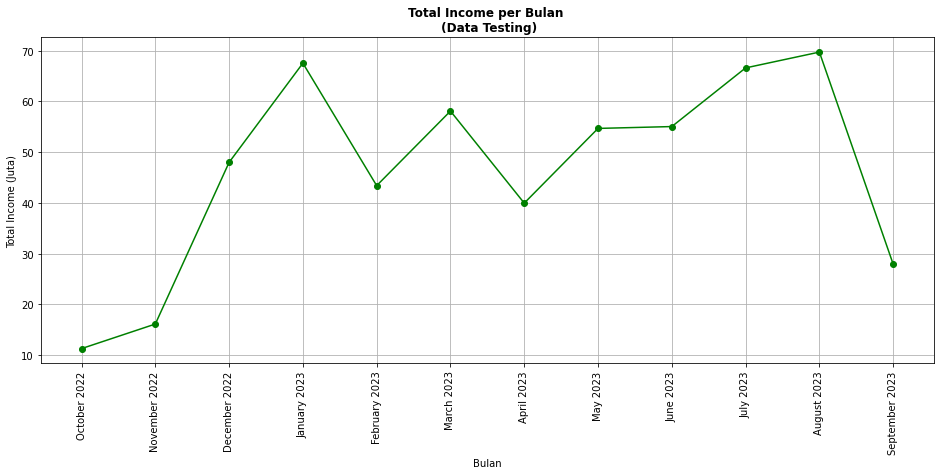

In [198]:

plt.figure(figsize=(16, 6))
plt.plot(test_day['Month'],test_day['Total Income'],  marker = 'o', linestyle='-', color='g')
plt.title('Total Income per Bulan \n (Data Testing)', weight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Income (Juta)')
plt.grid(True)
# Mengubah format ylabel menjadi jutaan
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.xticks(rotation=90)
plt.show()


## Hasil Machine Learning

In [207]:
import tensorflow as tf
from tensorflow import keras

path_prediksi = r"Hasil-prediksi.csv"
path_model = r"model-parkir1b.h5"
path_history = r"history-model-parkir1.csv"

df_prediksi = pd.read_csv(path_prediksi)
model = tf.keras.models.load_model(path_model, compile=False)
df_history = pd.read_csv(path_history)

### Susunan Layer Neural Network

In [201]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,153
Trainable params: 3,153
Non-trainable params: 0
_________________________________________________________________


### Training-Validation Loss

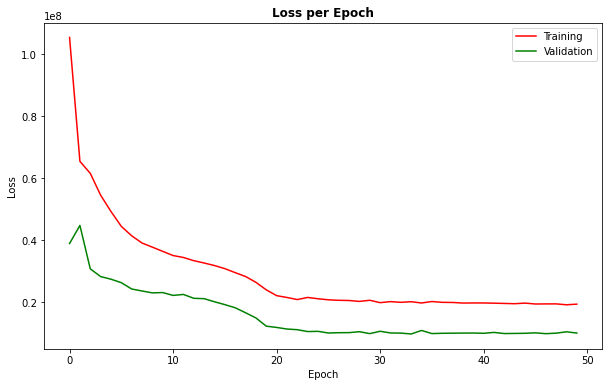

In [202]:
# Mendapatkan data loss dan epoch dari objek history
loss = df_history['loss']
valos = df_history['val_loss']


# Memplot loss per epoch

plt.figure(figsize=(10, 6))
plt.plot(loss, 'r-', label='Training')
plt.plot(valos, 'g-', label = 'Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch', weight='bold')
plt.legend()
plt.show()

In [208]:
df_prediksi.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration,predicted_income
0,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.033333,2032.7487
1,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.000000,2021.8457
2,MOTOR,CASUAL,0,2022-10-12,2022-10-12,6.250000,13386.5730
3,MOBIL,CASUAL,0,2022-10-12,2022-10-12,0.700000,5955.3276
4,MOTOR,CASUAL,0,2022-10-12,2022-10-12,8.033333,16920.3540


In [209]:
df_prediksi['Exit_date'] = pd.to_datetime(df_prediksi['Exit_date'], format='%Y-%m-%d')

# Ekstrak bulan dan tahun dari kolom Date
df_prediksi['Month'] = df_prediksi['Exit_date'].dt.strftime('%B %Y')
df_prediksi = df_prediksi.sort_values(by='Exit_date')

In [210]:
### Ukur metric error
from sklearn.metrics import r2_score
# Mengukur R-squared antara kolom aktual dan kolom yang diprediksi
r_squared = r2_score(df_prediksi['Total Income'], df_prediksi['predicted_income'])


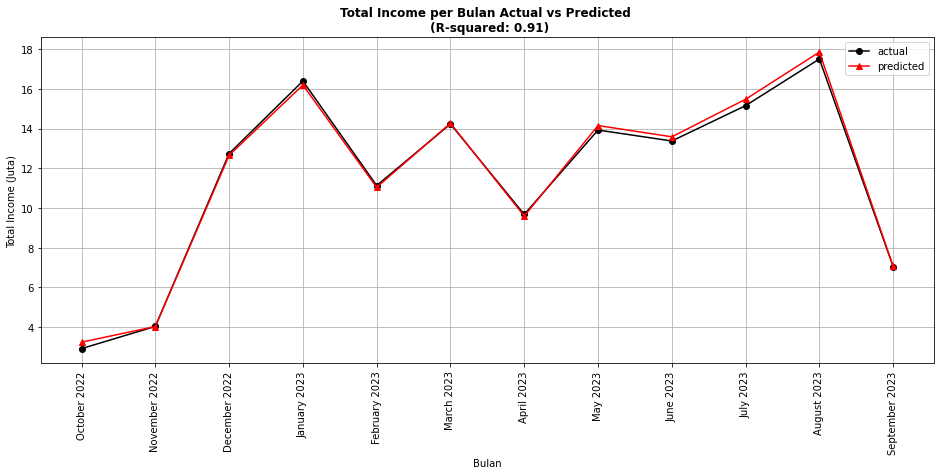

In [211]:
actual_income = df_prediksi.groupby('Month')['Total Income'].sum().reset_index()
actual_income['Month_num'] = pd.to_datetime(actual_income['Month'], format='%B %Y')
actual_income = actual_income.sort_values(by='Month_num')
actual_income.reset_index(drop=True, inplace=True)

pred_income = df_prediksi.groupby('Month')['predicted_income'].sum().reset_index()
pred_income['Month_num'] = pd.to_datetime(pred_income['Month'], format='%B %Y')
pred_income = pred_income.sort_values(by='Month_num')
pred_income.reset_index(drop=True, inplace=True)

plt.figure(figsize=(16, 6))
plt.plot(actual_income['Month'],actual_income['Total Income'],  marker = 'o', linestyle='-', color='k', label='actual')
plt.plot(pred_income['Month'],pred_income['predicted_income'],  marker = '^', linestyle='-', color='r', label='predicted')



plt.title(f'Total Income per Bulan Actual vs Predicted \n (R-squared: {r_squared:.2f})', weight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Income (Juta)')
plt.grid(True)
# Mengubah format ylabel menjadi jutaan
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.xticks(rotation=90)
plt.legend()
plt.show()